In [31]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(rc={'figure.figsize':(20,10)})

ORG_NAME = "Organic"
CONV_NAME = "Conventional"

data = pd.read_csv('avocado.csv')

data['Date']= pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)

season_dict = {'1':'Winter',
               '2':'Spring', 
               '3':'Spring', 
               '4':'Spring', 
               '5':'Summer', 
               '6':'Summer', 
               '7':'Summer', 
               '8':'Autumn', 
               '9':'Autumn', 
               '10':'Autumn', 
               '11':'Winter', 
               '12':'Winter'}


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [3]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
conv = data[data.type == 'conventional']
org = data[data.type == 'organic']

## Price distribution per type

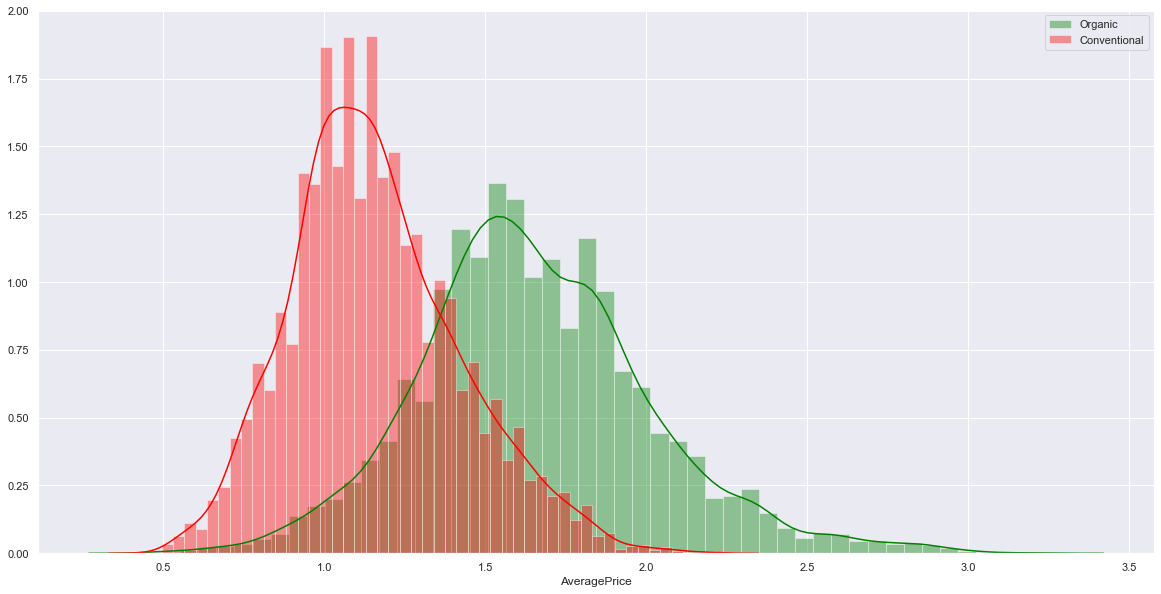

In [24]:
ax = sns.distplot(org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.distplot(conv.AveragePrice, label=CONV_NAME, color='red')
ax.legend()

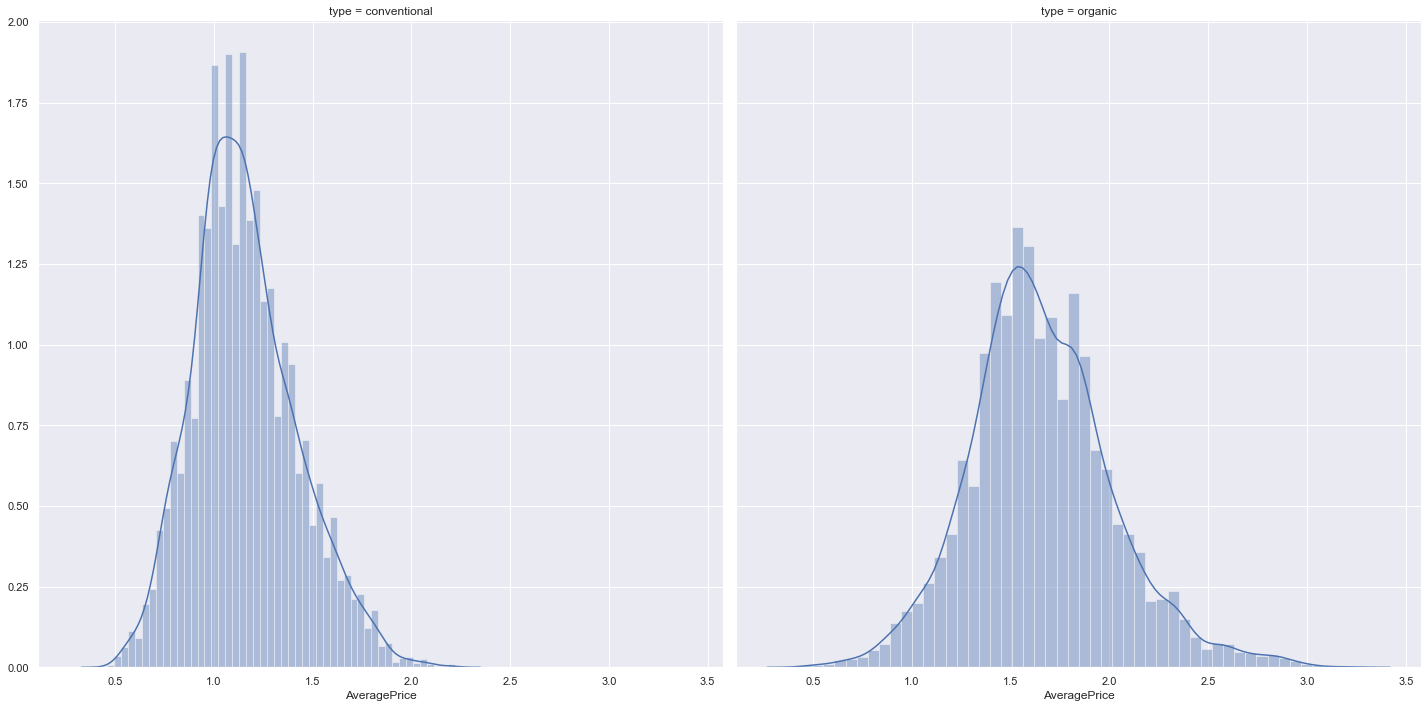

In [25]:
g = sns.FacetGrid(data, col="type", size=10)
g.map(sns.distplot, "AveragePrice")

## Price variation through time

Let's visualize the price variation through time by type of Avocado. First I make a single plot then I use the FactGrid function of sns to split the plot on 2 sub-plots.

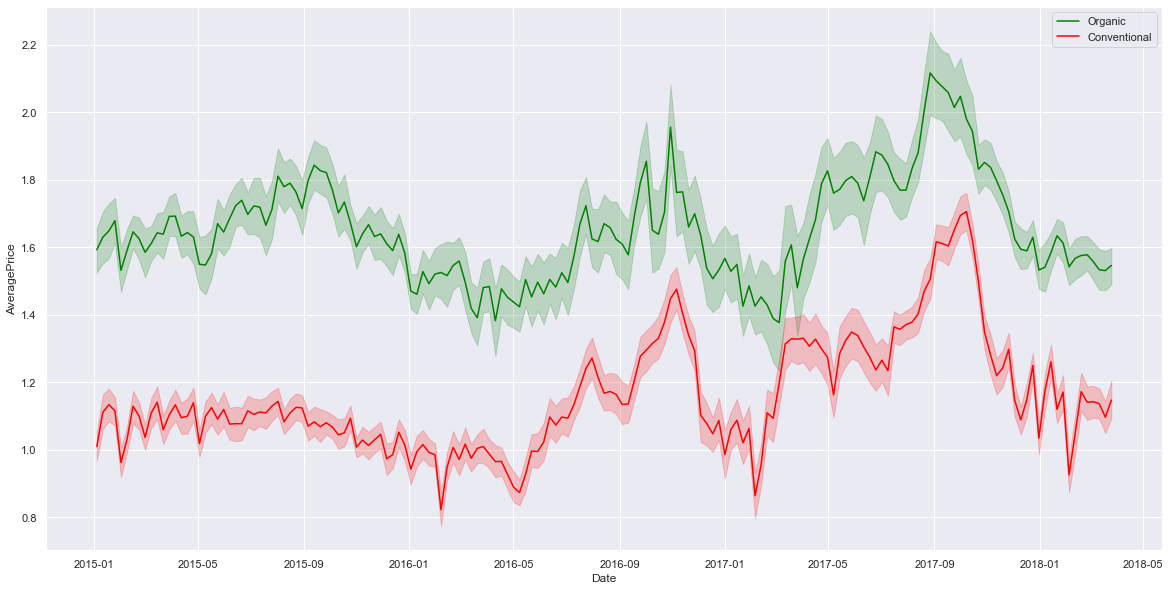

In [28]:
ax = sns.lineplot(x=org.index, y=org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.lineplot(x=conv.index, y=conv.AveragePrice, label=CONV_NAME, color='red')

## Relationship between Price and Volume

Let's analyze the relationship between price and volume: I expect the price being in inverse relationship with volume, because high produced volume brings to lower prices (offer-demand basic law).

### Organic

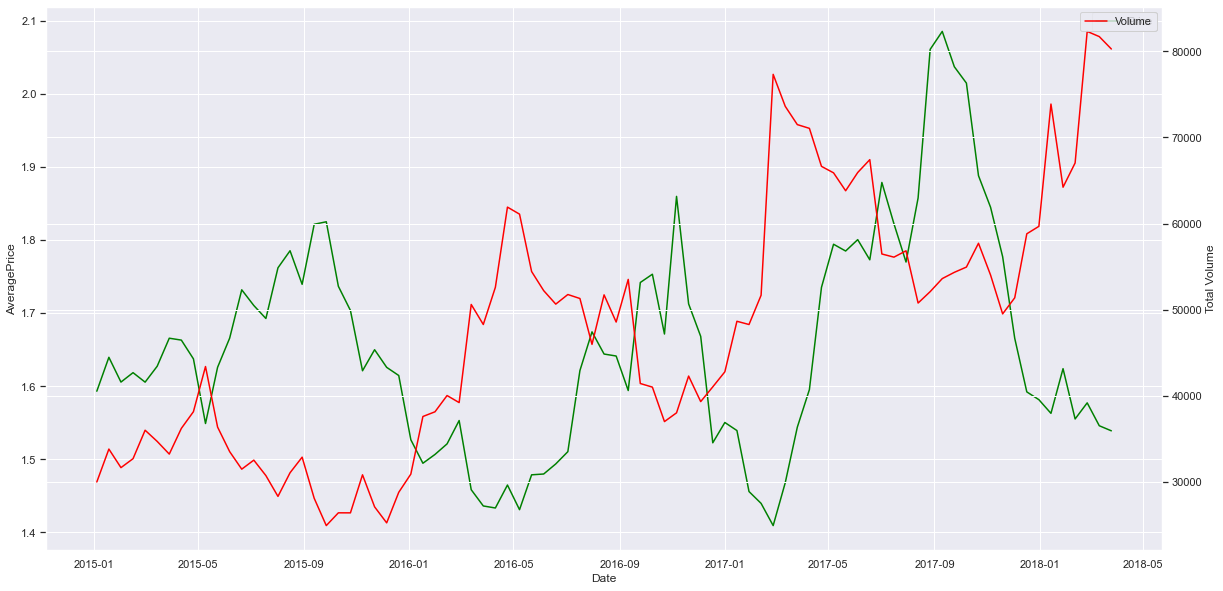

In [49]:
org_res = org.resample('2w').mean()
ax = sns.lineplot(x=org_res.index, y=org_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=org_res.index, y=org_res['Total Volume'], label='Volume', color='red', ax=ax2)

## Conventional

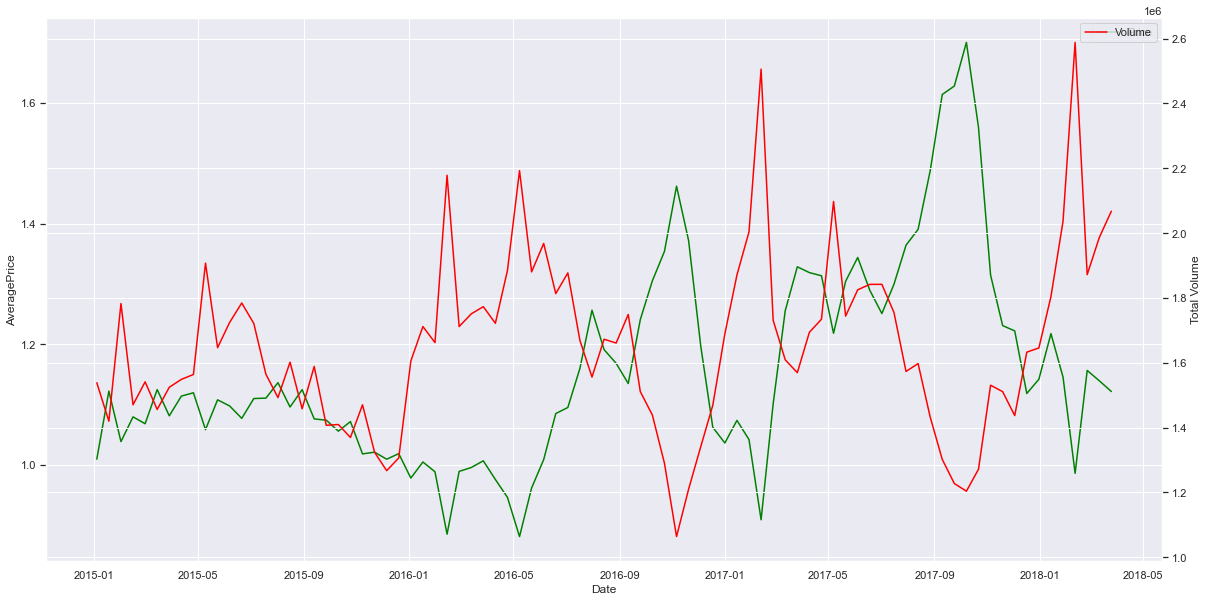

In [50]:
conv_res = conv.resample('2w').mean()
ax = sns.lineplot(x=conv_res.index, y=conv_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=conv_res.index, y=conv_res['Total Volume'], label='Volume', color='red', ax=ax2)

We can observe how the price is inversely related to the volume produces. Let's see the correlation value between Volume and Price:

In [61]:
print('Correlation for Organic', org_res['Total Volume'].corr(org_res['AveragePrice']))
print('Correlation for Conventional', conv_res['Total Volume'].corr(conv_res['AveragePrice']))

Correlation for Organic -0.12157112805891053
Correlation for Conventional -0.4878667309918981


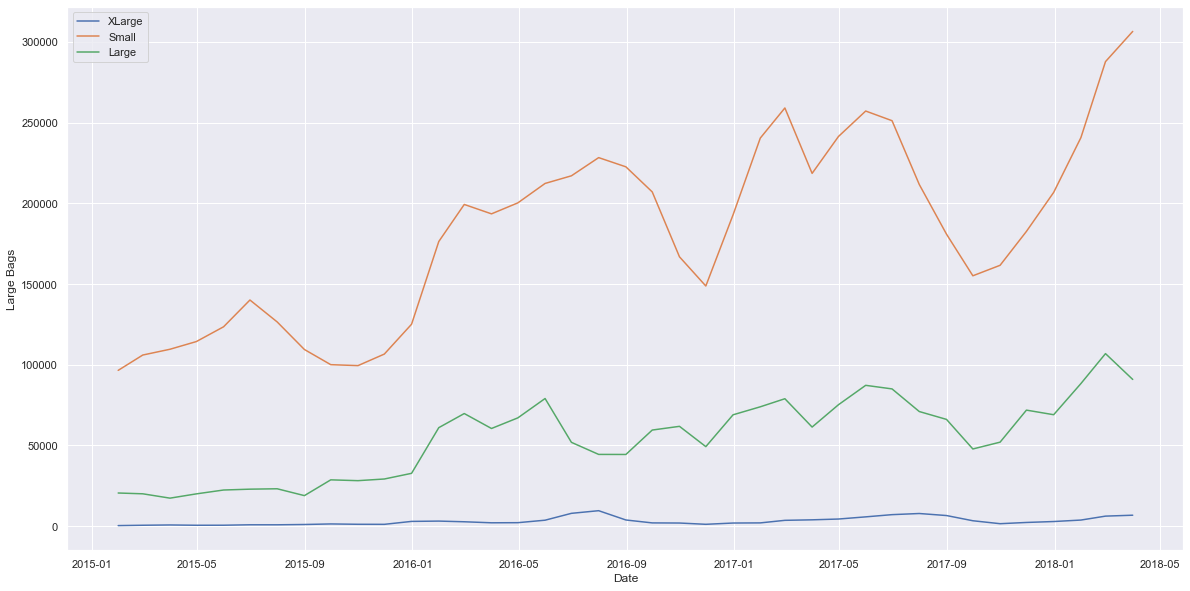

In [88]:
data_2w = data.resample('1m').mean()
ax = sns.lineplot(data_2w.index, data_2w["XLarge Bags"], label='XLarge')
ax = sns.lineplot(data_2w.index, data_2w["Small Bags"], label='Small')
ax = sns.lineplot(data_2w.index, data_2w["Large Bags"], label='Large')
ax.legend()

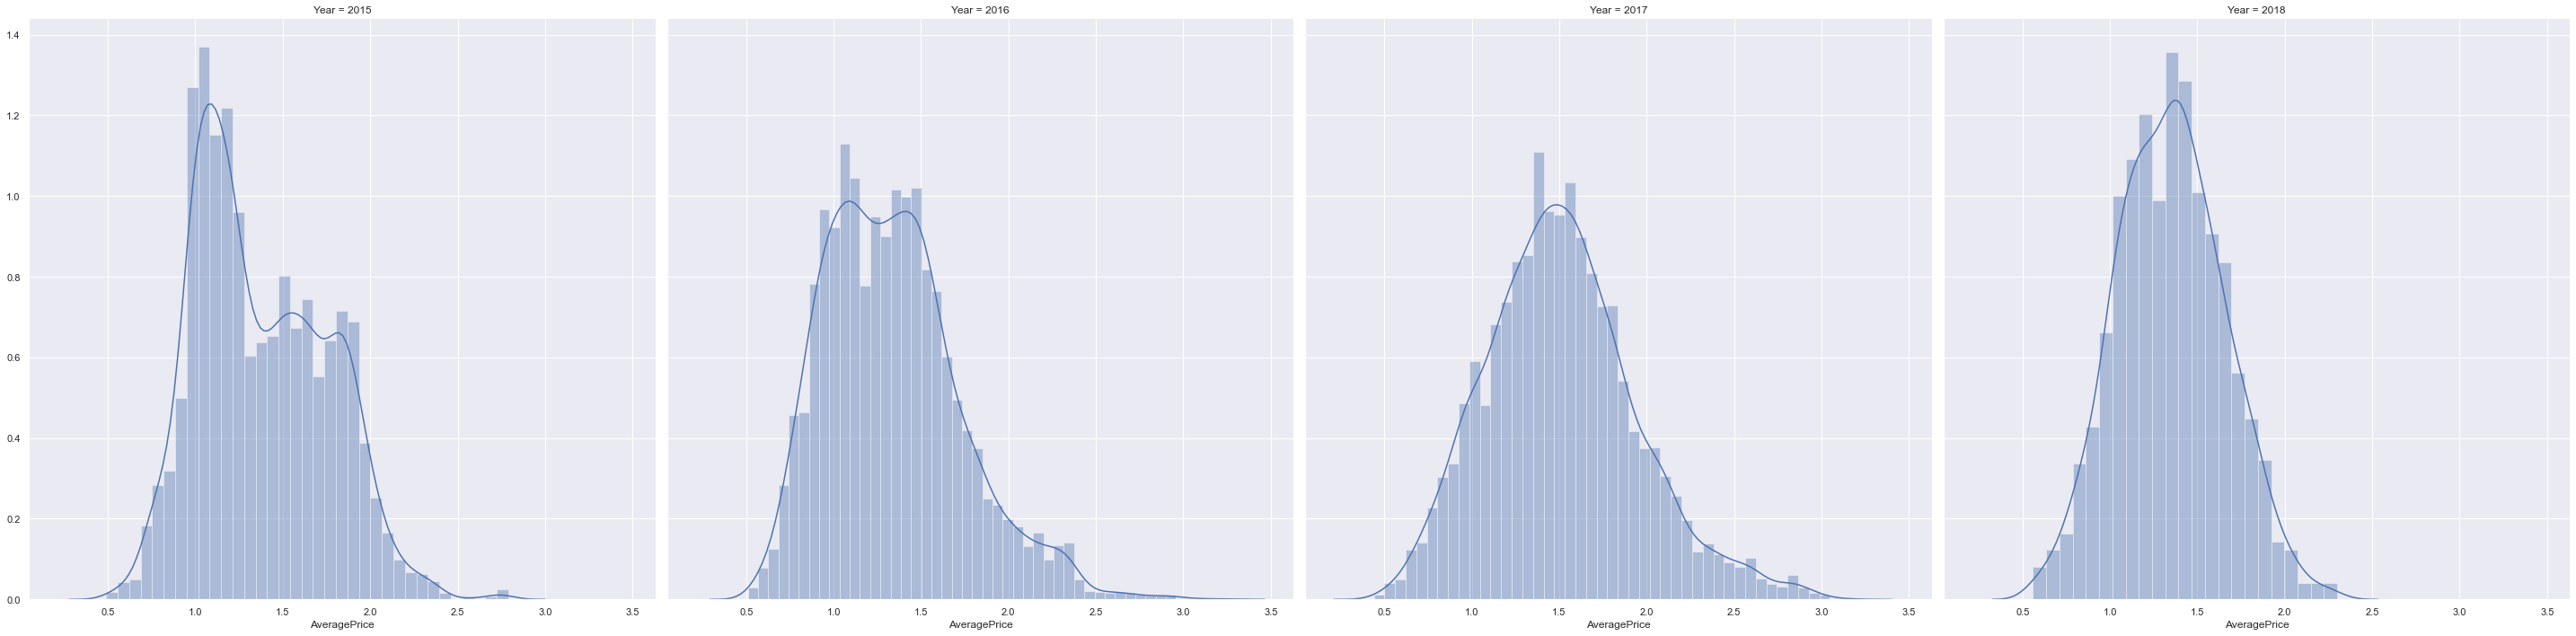

In [32]:
data['Year'] = data.index.year
data['Month'] = data.index.month.astype(str)
data['Day'] = data.index.day
data['Season'] = data.Month.apply(lambda x: season_dict[x])

g = sns.FacetGrid(data, col='Year', size=10)
g.map(sns.distplot, "AveragePrice")

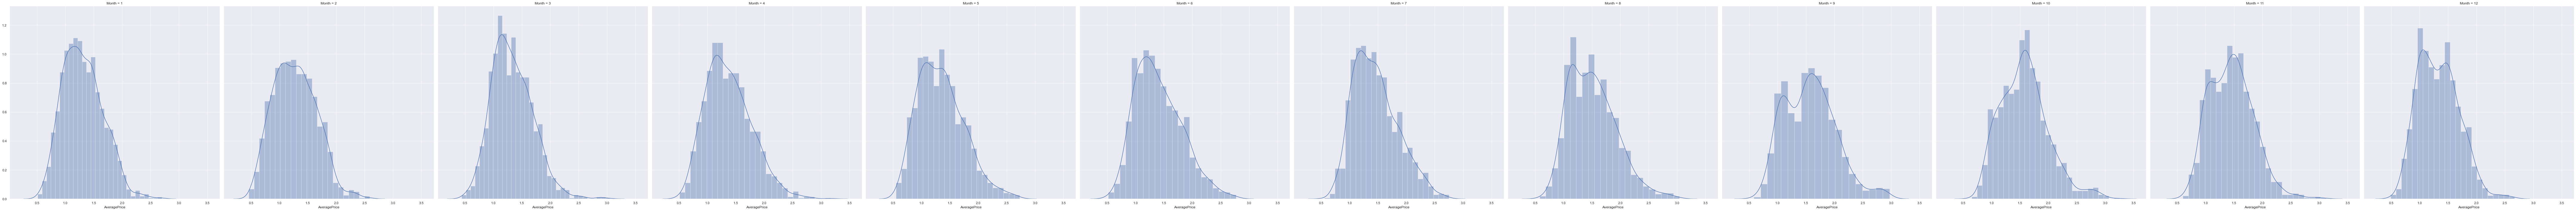

In [93]:

g = sns.FacetGrid(data, col='Month', size=10)
g.map(sns.distplot, "AveragePrice")

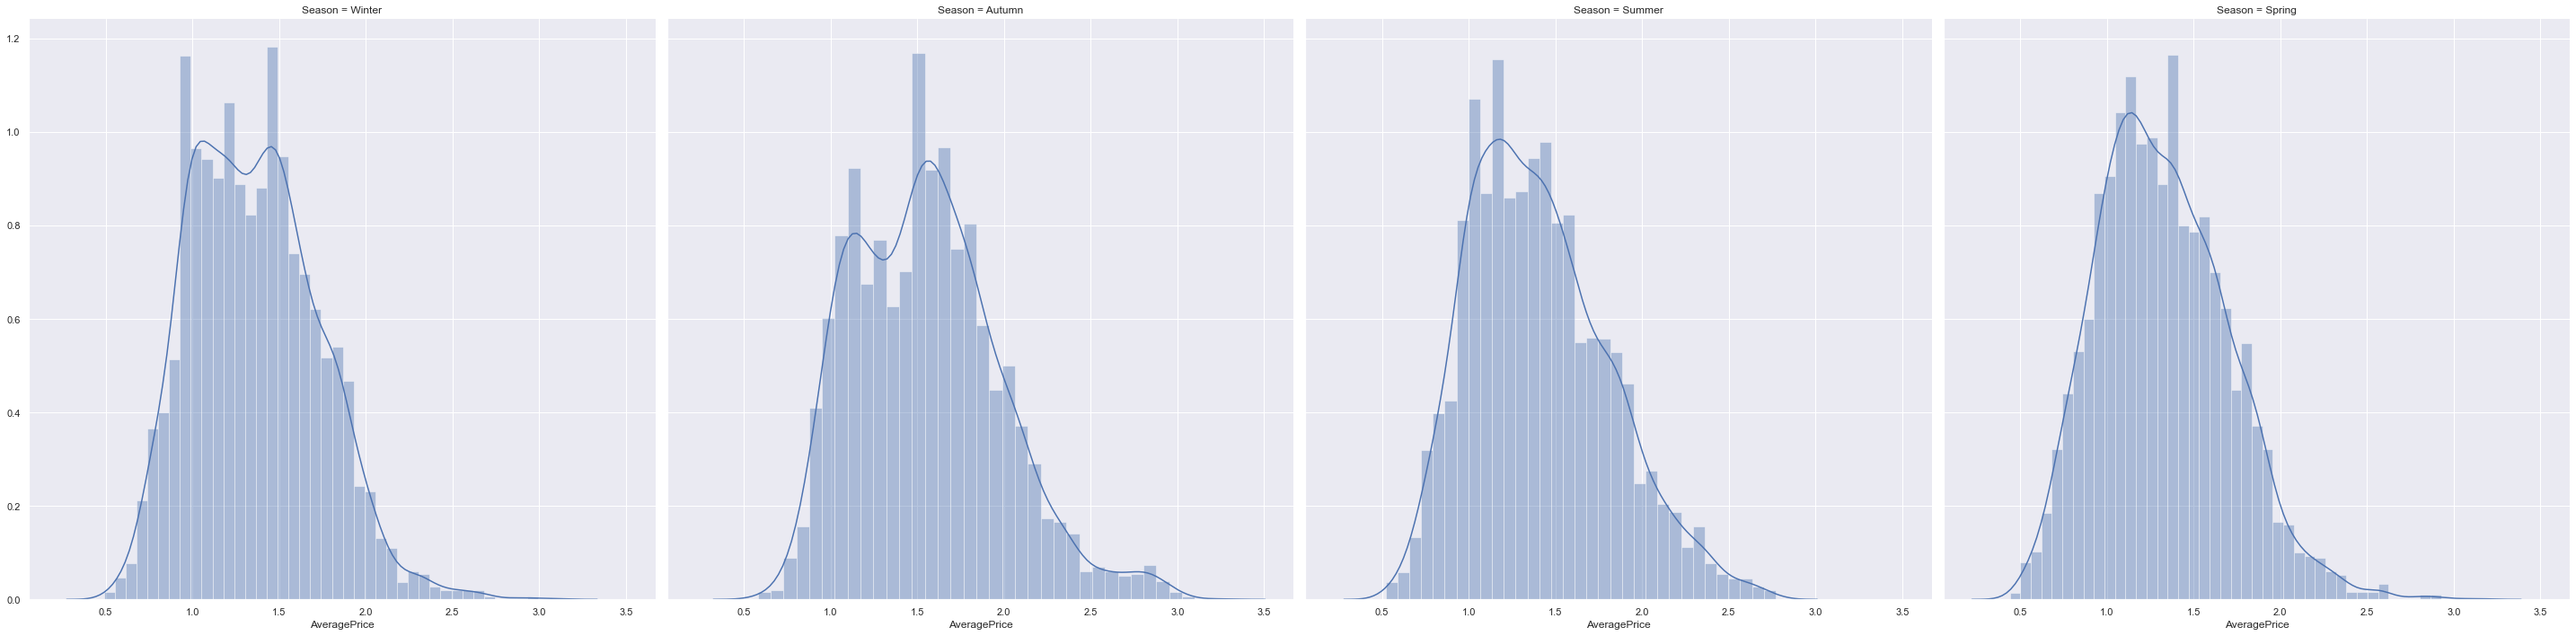

In [20]:
g = sns.FacetGrid(data, col='Season', size=10)
g.map(sns.distplot, "AveragePrice")

In [47]:
grouped = data.groupby(['Month']).mean()
g = sns.FacetGrid(data, col='type', size=10)
g.map(sns.lineplot, "","AveragePrice")

KeyError: 'type'

In [43]:
grouped.index = grouped.index.astype(int)
grouped.sort_index(ascending=True)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,Day
Month,,,,,,,,,,,,,
1,40.603909,1.311019,9.035654e+05,297091.451924,328309.637593,23469.554733,254693.975550,190706.250520,61666.720267,2321.004763,2016.500000,2016.500000,16.000000
2,35.243056,1.274387,1.018825e+06,356672.920885,348558.374931,28394.881146,285196.078073,213055.035712,68894.364792,3246.677569,2016.500000,2016.500000,14.750000
3,31.698802,1.332255,8.845054e+05,305386.962173,294504.626585,24952.196558,259658.362021,201308.615027,55152.129385,3197.617609,2016.411765,2016.411765,15.352941
4,36.682336,1.374380,8.801935e+05,314698.492251,291711.817500,25904.380947,247878.811068,189665.529252,55711.218697,2502.063120,2016.076923,2016.076923,15.076923
5,32.134259,1.346601,9.727150e+05,349946.910390,336679.188056,28377.930767,257710.995238,193425.140708,61144.593591,3141.260939,2015.928571,2015.928571,16.428571
6,27.827666,1.408964,9.293397e+05,337007.417141,302172.503879,28951.149985,261208.611175,202713.415943,53218.635417,5276.559815,2015.998454,2015.998454,15.824575
7,23.497354,1.462077,8.590482e+05,292245.798466,294714.809451,24521.787639,247558.728228,193294.104643,47831.054795,6433.567467,2016.071429,2016.071429,16.214286
8,18.996439,1.512514,8.036857e+05,290614.959295,282362.133625,19615.213554,211092.107201,166253.229174,41272.813348,3566.063967,2015.923077,2015.923077,16.615385
9,14.830247,1.572654,7.533192e+05,258561.835085,275712.053642,17425.176389,201618.164769,154073.842739,45327.096898,2217.225131,2016.000000,2016.000000,14.833333
